<a href="https://colab.research.google.com/github/puranjay123/100_Days_of_MachineLearning/blob/main/upper_confidene__bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')


In [10]:
import math
N =10000
d = 10
ads_selected=[]
number_ad_selected = [0]*d
sum_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_upper_bound =0
  for i in range(0,d):
    if (number_ad_selected[i]>0):
      average_reward = sum_of_rewards[i]/number_ad_selected[i]
      delta_i = math.sqrt(3/2 *math.log(n+1)/ number_ad_selected[i])
      upper_bound = average_reward+ delta_i

    else :
      upper_bound = 1e400

    if (upper_bound> max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_ad_selected[ad] = number_ad_selected[ad]+1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] = sum_of_rewards[ad]+reward
  total_reward = total_reward+reward


(array([ 705.,  387.,  186.,  345., 6323.,  150.,  292., 1170.,  256.,
         186.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

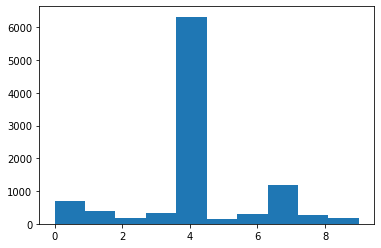

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()